In [167]:
include("../src/KagomeTransport.jl")

using LinearAlgebra
using StaticArrays
using Brillouin
using PlotlyJS
using .KagomeTransport.Kagome_Hamiltonian
using Printf

In [168]:
assets_dir = "../assets/";

In [169]:
function make_cartesian(vecs, basis)
    """
    Calculates for each v in vectors, v1 * basis[1, :] + v2 * basis[2, :]
        This transforms from the reduced coordinates (w.r.t basis) to the cartesian coordinates 
    """
    cvecs = similar(vecs)
    for (i, v) in enumerate(vecs)
        cvecs[i] = basis' * v
    end
    cvecs
end

make_cartesian (generic function with 1 method)

--- Plotting the Wigner-Seitz cell in real space. 

--- Vertices of the real Wigner-Seitz cell (in reduced coordinates): 
  0.333333   0.333333 
 -0.333333   0.666667 
 -0.666667   0.333333 
 -0.333333  -0.333333 
  0.333333  -0.666667 
  0.666667  -0.333333 

--- Vertices of the real Wigner-Seitz cell (in cartesian coordinates): 
  0.500000   0.288675 
  0.000000   0.577350 
 -0.500000   0.288675 
 -0.500000  -0.288675 
  0.000000  -0.577350 
  0.500000  -0.288675 


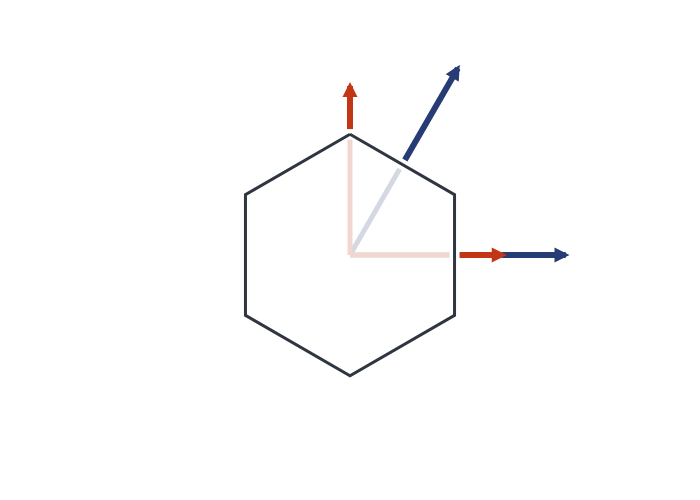

In [170]:
let
    print("--- Plotting the Wigner-Seitz cell in real space. \n")
    print("\n")

    As = [real_basis[i, :] for i ∈ 1 : size(real_basis, 1)]
    real_wignerseitz = wignerseitz(As)

    vertices = real_wignerseitz.verts

    print("--- Vertices of the real Wigner-Seitz cell (in reduced coordinates): \n")
    for v ∈ vertices
        @printf("%10f %10f \n", v[1], v[2])
    end

    cvecs = make_cartesian(vertices, As)

    print("\n")
    print("--- Vertices of the real Wigner-Seitz cell (in cartesian coordinates): \n")
    for v ∈ cvecs
        @printf("%10f %10f \n", v[1], v[2])
    end

    pbzb = plot(real_wignerseitz)
    savefig(pbzb, assets_dir * "real_pbzb.png")
    display(pbzb)

end

--- Plotting the Wigner-Seitz cell in reciprocal space. 

--- Vertices of the reciprocal Wigner-Seitz cell (in reduced coordinates): 
 -0.333333   0.333333 
 -0.666667  -0.333333 
 -0.333333  -0.666667 
  0.333333  -0.333333 
  0.666667   0.333333 
  0.333333   0.666667 

--- Vertices of the reciprocal Wigner-Seitz cell (in cartesian coordinates): 
 -0.333333   0.577350 
 -0.666667   0.000000 
 -0.333333  -0.577350 
  0.333333  -0.577350 
  0.666667   0.000000 
  0.333333   0.577350 


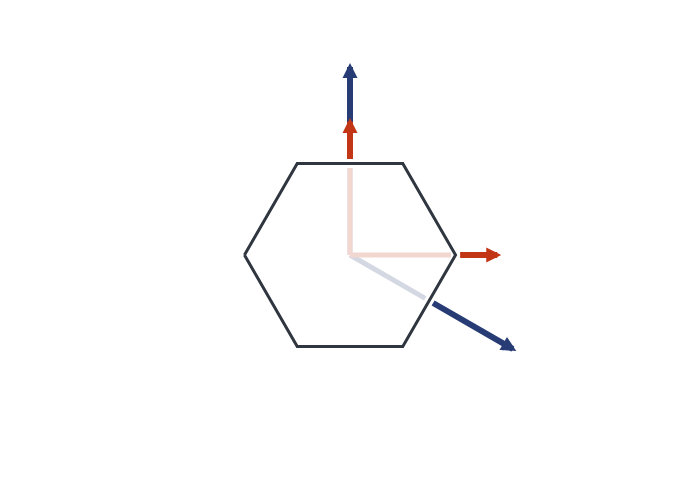

In [171]:
let 
    print("--- Plotting the Wigner-Seitz cell in reciprocal space. \n")
    print("\n")

    Bs = [recip_basis[i, :] for i ∈ 1 : size(recip_basis, 1)]
    recip_wignerseitz = wignerseitz(Bs)

    vertices = recip_wignerseitz.verts
    print("--- Vertices of the reciprocal Wigner-Seitz cell (in reduced coordinates): \n")
    for v ∈ vertices
        @printf("%10f %10f \n", v[1], v[2])
    end


    cvecs = make_cartesian(vertices, Bs)

    print("\n")
    print("--- Vertices of the reciprocal Wigner-Seitz cell (in cartesian coordinates): \n")
    for v ∈ cvecs
        @printf("%10f %10f \n", v[1], v[2])
    end


    pbzb = plot(recip_wignerseitz)
    savefig(pbzb, assets_dir * "recip_pbzb.png")
    display(pbzb)
end

In [23]:
# Now, the K-Points 
global const high_symmetry_points = Dict{String, Vector{Float64}}(
    "K"=> [0.6666667, 0.0], 
    "M"=> ([0.3333333, 0.577350] + [0.666666667, 0.0]) / 2.0,
    "Γ"=> [0.0, 0.0] 
)

Dict{String, Vector{Float64}} with 3 entries:
  "M" => [0.5, 0.288675]
  "Γ" => [0.0, 0.0]
  "K" => [0.666667, 0.0]

In [28]:
global const kpath_nodes::Vector{Vector{Float64}} = [high_symmetry_points["Γ"], 
                    high_symmetry_points["K"], 
                    high_symmetry_points["M"], 
                    high_symmetry_points["Γ"]];
